In [1]:
from ipywidgets import interact
import numpy as np

# %matplotlib inline
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt


['neoanalyzer.py', '1302']
Loading...
...Loading Complete!

-----__init__-----
time after stim is set to: 0.5

-----finding minimum trial lengths----
smallest baseline period (time before stimulus): 1.06749987602
smallest trial length (time after stimulus): 2.77346670628

-----__trim_wt-----
whisker tracking data found! trimming data to be all the same length in time
whisker tracking data found! trimming data to be all the same length in time

-----classify_whisking_trials-----
making "whisking" histogram


/home/greg/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


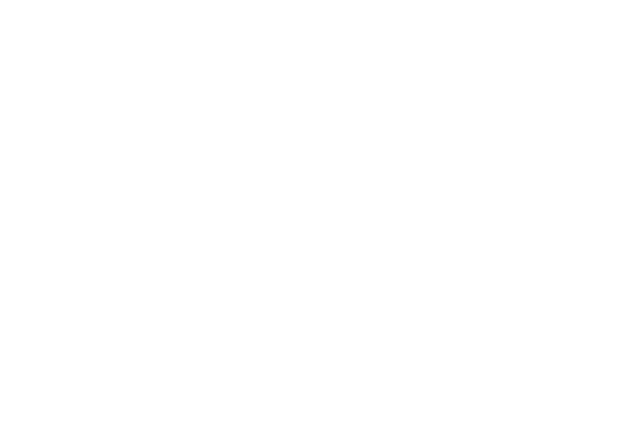

Enter a threshold value: 110

-----computing rates----
using running to find good trials


In [2]:
%run neoanalyzer.py {'1302'}
# neuro.plot_tuning_curve(kind='evk_count')

In [3]:
neuro.rates(kind='wsk_boolean')
# neuro.plot_tuning_curve(kind='evk_count')


-----computing rates----
using whisking to find good trials


<IPython.core.display.Javascript object>


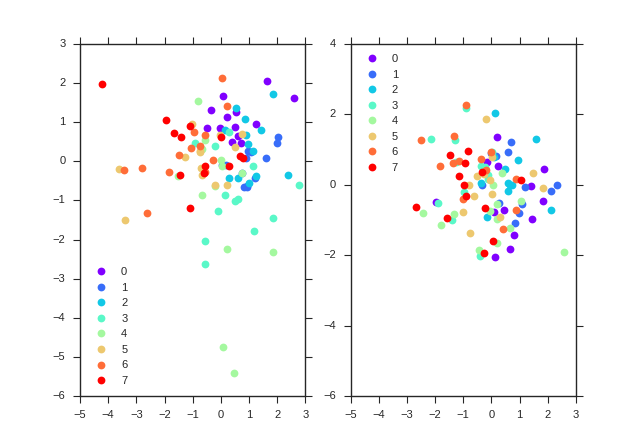


-----make design matrix----

-----make design matrix----


In [8]:
# LDA analysis
trode = 1
cond_offset = 18

plt.figure()
lda = LinearDiscriminantAnalysis(n_components=2)
X, y = neuro.make_design_matrix('evk_count', trode=trode)
X_r0 = X[y<8, :]
y_r0 = y[y<8]
X_r0 = lda.fit(X_r0, y_r0).transform(X_r0)
plt.subplot(1,2,1)
color=iter(cm.rainbow(np.linspace(0,1,len(np.unique(y_r0)))))
for k in range(len(np.unique(y_r0))):
   c = next(color)
   plt.plot(X_r0[y_r0==k, 0], X_r0[y_r0==k, 1], 'o', c=c, label=str(k))
plt.legend(loc='best')


X, y = neuro.make_design_matrix('evk_count', trode=trode)
trial_inds = np.logical_and(y>=9, y<17) # no control position
# trial_inds = np.logical_and(y>=18, y<26) # no control position
X_r0 = X[trial_inds, :]
y_r0 = y[trial_inds]
X_r0 = lda.fit(X_r0, y_r0).transform(X_r0)
color=iter(cm.rainbow(np.linspace(0,1,len(np.unique(y_r0)))))
plt.subplot(1,2,2)
for k in range(len(np.unique(y_r0))):
    c = next(color)
    plt.plot(X_r0[y_r0==k+9, 0], X_r0[y_r0==k+9, 1], 'o', c=c, label=str(k))
    plt.xlim(-5,3)
    plt.ylim(-6, 4)
#     plt.plot(X_r0[y_r0==k+9+9, 0], X_r0[y_r0==k+9+9, 1], 'o', c=c, label=str(k))
plt.legend(loc='best')
plt.show()

In [5]:
X, y = neuro.make_design_matrix('evk_count', trode=trode)
X_r0 = X[y<8, :]
y_r0 = y[y<8]
r_nolight = np.corrcoef(X_r0.T)

X, y = neuro.make_design_matrix('evk_count', trode=trode)
trial_inds = np.logical_and(y>=9, y<17) # no control position
X_r0 = X[trial_inds, :]
y_r0 = y[trial_inds]
r_s1light = np.corrcoef(X_r0.T)

plt.subplots(1,2)
plt.subplot(1,3,1)
plt.imshow(r_nolight, interpolation='none', clim=(-0.3, 0.3), cmap='bwr')
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(r_s1light, interpolation='none', clim=(-0.3, 0.3), cmap='bwr')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(r_s1light-r_nolight, interpolation='none', clim=(-0.3, 0.3), cmap='bwr')
plt.colorbar()
plt.show()
r_diff = r_s1light-r_nolight
plt.figure()
plt.hist(r_diff[np.triu_indices(10,1)], bins=40)
np.mean(r_diff[np.triu_indices(10,1)])


-----make design matrix----

-----make design matrix----


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

IndexError: index 9 is out of bounds for axis 1 with size 9

In [ ]:
# set-point analysis

def plot_setpoint(neuro, cond=0, color='k', error='sem'):
    
    ax = plt.gca()
    sp_temp = neuro.wt[cond][:, 1, :]
    mean_sp = np.mean(sp_temp, axis=1)
    se      = sp.stats.sem(sp_temp, axis=1)
    
    # inverse of the CDF is the percentile function. ppf is the percent point funciton of t.
    if error == 'ci':
        err = se*sp.stats.t.ppf((1+0.95)/2.0, sp_temp.shape[1]-1) # (1+1.95)/2 = 0.975
    elif error == 'sem':
        err = se

    plt.plot(neuro.wtt, mean_sp, color)
    plt.fill_between(neuro.wtt, mean_sp - err, mean_sp + err, facecolor=color, alpha=0.3)
    return ax

for k in range(neuro.control_pos):
    plt.figure()
    plot_setpoint(neuro, cond=k, color='k')
    plot_setpoint(neuro, cond=k+9, color='r')
#     plot_setpoint(neuro, cond=k+9+9, color='b')
    plt.xlim(-0.5, 2.0)
    plt.xlabel('time (s)')
    plt.ylabel('set-point (deg)')
    plt.title('condition {}'.format(str(k)))
    plt.show()

# neuro.rates(kind='wsk_boolean')
# print(neuro.num_good_trials)

